In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time, os
import cmcrameri.cm as cm

from tqdm import tqdm
from utils import ELFData, ELFModel

## Load and filter data

In [2]:
# Load data
unlabeled = ELFData()
unlabeled.load_processed(dirname='data/unlabeled', structure=False)
print('Number of examples:', len(unlabeled.data))
unlabeled.data.head()

Parse profiles: 100%|██████████| 320585/320585 [00:19<00:00, 16791.41it/s]      


Number of examples: 320585


,formula,r_src,r_dst,e_src,e_dst,g_src,g_dst,elf,e_diff,edge_src,edge_dst,l,r_diff,g_diff,specie_src,specie_dst,mixed,id
0,100,2.2,1.0,0.82,3.16,1,17,"[0.0015327815625000077, 0.002364966985433359, ...",2.34,0,4,3.812422,1.2,16,K,Cl,False,0
1,100,2.2,1.0,0.82,3.16,1,17,"[0.0015327815625000077, 0.002364966985433359, ...",2.34,0,5,3.812422,1.2,16,K,Cl,False,0
2,100,2.2,1.0,0.82,3.16,1,17,"[0.0015327815625000077, 0.0070974035970135085,...",2.34,0,6,3.812422,1.2,16,K,Cl,False,0
3,100,2.2,1.0,0.82,3.16,1,17,"[0.0015327815625000077, 0.002364966985433359, ...",2.34,0,7,3.812422,1.2,16,K,Cl,False,0
4,100,2.2,1.0,0.82,3.16,1,17,"[0.0015327815625000077, 0.0070974035970135085,...",2.34,0,8,3.812422,1.2,16,K,Cl,False,0


In [3]:
# Sort and filter data
unlabeled.data = unlabeled.data[~unlabeled.data['mixed']]
unlabeled.get_pdf_cdf()
unlabeled.sort_by_cdf()
print('Number of examples:', len(unlabeled.data))
unlabeled.data.head()

Number of examples: 279511


,formula,r_src,r_dst,e_src,e_dst,g_src,g_dst,elf,e_diff,edge_src,...,specie_src,specie_dst,mixed,id,A,pdf,cdf,elf_srt,pdf_srt,cdf_srt
0,100,2.2,1.0,0.82,3.16,1,17,"[0.0015327815625000077, 0.002364966985433359, ...",2.34,0,...,K,Cl,False,0,11.750637,"[0.00013044242258193029, 0.0002012628742761318...","[0.00013044242258193029, 0.0003317052968580622...","[0.1705011286207772, 0.2036299837170363, 0.284...","[0.014509947675761763, 0.017329271852047804, 0...","[0.014509947675761763, 0.03183921952780957, 0...."
1,100,2.2,1.0,0.82,3.16,1,17,"[0.0015327815625000077, 0.002364966985433359, ...",2.34,0,...,K,Cl,False,0,11.750637,"[0.00013044242258193029, 0.0002012628742761318...","[0.00013044242258193029, 0.0003317052968580622...","[0.1705011286207772, 0.20362998371703642, 0.28...","[0.014509947675761763, 0.017329271852047815, 0...","[0.014509947675761763, 0.031839219527809576, 0..."
2,100,2.2,1.0,0.82,3.16,1,17,"[0.0015327815625000077, 0.0070974035970135085,...",2.34,0,...,K,Cl,False,0,12.044611,"[0.00012725870353490256, 0.0005892596846916265...","[0.00012725870353490256, 0.000716518388226529,...","[0.22271259596505436, 0.18323072767531332, 0.1...","[0.018490642709179408, 0.015212673105021801, 0...","[0.018490642709179408, 0.03370331581420121, 0...."
3,100,2.2,1.0,0.82,3.16,1,17,"[0.0015327815625000077, 0.002364966985433359, ...",2.34,0,...,K,Cl,False,0,11.750637,"[0.00013044242258193029, 0.0002012628742761318...","[0.00013044242258193029, 0.0003317052968580622...","[0.1705011286207772, 0.2036299837170363, 0.284...","[0.014509947675761763, 0.017329271852047804, 0...","[0.014509947675761763, 0.03183921952780957, 0...."
4,100,2.2,1.0,0.82,3.16,1,17,"[0.0015327815625000077, 0.0070974035970135085,...",2.34,0,...,K,Cl,False,0,12.044611,"[0.00012725870353490256, 0.0005892596846916265...","[0.00012725870353490256, 0.000716518388226529,...","[0.2227125959650543, 0.18323072767531332, 0.19...","[0.0184906427091794, 0.015212673105021801, 0.0...","[0.0184906427091794, 0.033703315814201204, 0.0..."


### Calculate columns

In [4]:
unlabeled.data['pdf-l_srt'] = unlabeled.data[['pdf_srt', 'l']].apply(
    lambda x: x.pdf_srt/(x.l/len(x.pdf_srt)), axis=1)

unlabeled.data['cdf-A_srt'] = unlabeled.data[['cdf_srt', 'A']].apply(lambda x: x.cdf_srt*x.A, axis=1)

## Predict data classes

In [5]:
n_classes = 4
n_components = 10
columns = ['elf_srt', 'pdf_srt', 'pdf-l_srt', 'cdf_srt', 'cdf-A_srt']
features = ['l', 'A']
n_estimators = 150
max_depth = 12

### Load models

In [6]:
savedir = 'models/'
models = []
for column in columns:
    path = '_'.join([j + str(k) for (j,k) in zip(['c', 'z', 'n', 'd'],
                     [n_classes, n_components, n_estimators, max_depth])] + [column] + features)
    models.append(ELFModel(n_classes))
    models[-1].load_model(savedir + path)

### Predict

In [7]:
for i in tqdm(range(len(columns)), bar_format=unlabeled.bar_format):
    models[i].prepare_inputs(unlabeled.data)
    unlabeled.data = models[i].clf_predict(unlabeled.data)

100%|██████████| 5/5 [00:44<00:00,  8.87s/it]                                   


In [8]:
unlabeled.data.head()

,formula,r_src,r_dst,e_src,e_dst,g_src,g_dst,elf,e_diff,edge_src,...,pdf_srt_pred,z_pdf-l_srt,pdf-l_srt_pred_proba,pdf-l_srt_pred,z_cdf_srt,cdf_srt_pred_proba,cdf_srt_pred,z_cdf-A_srt,cdf-A_srt_pred_proba,cdf-A_srt_pred
0,100,2.2,1.0,0.82,3.16,1,17,"[0.0015327815625000077, 0.002364966985433359, ...",2.34,0,...,3,"[-1.4945753043948937, -0.7040184601888102, -0....","[0.03333333333333333, 0.006666666666666667, 0....",3,"[0.5477923213645963, 0.17560694250467607, -0.1...","[0.03333333333333333, 0.0, 0.3, 0.666666666666...",3,"[-11.679129332372147, 5.348374937186667, 0.086...","[0.034755019206709044, 0.0, 0.4452449807932909...",3
1,100,2.2,1.0,0.82,3.16,1,17,"[0.0015327815625000077, 0.002364966985433359, ...",2.34,0,...,3,"[-1.4945753043948937, -0.7040184601888103, -0....","[0.03333333333333333, 0.006666666666666667, 0....",3,"[0.5477923213645963, 0.17560694250467607, -0.1...","[0.03333333333333333, 0.0, 0.3, 0.666666666666...",3,"[-11.679129332372147, 5.348374937186667, 0.086...","[0.034755019206709044, 0.0, 0.4452449807932909...",3
2,100,2.2,1.0,0.82,3.16,1,17,"[0.0015327815625000077, 0.0070974035970135085,...",2.34,0,...,3,"[-1.3964580609093797, -0.6400228232544939, -0....","[0.08, 0.0, 0.16666666666666666, 0.75333333333...",3,"[0.4277850266199073, 0.039773129189330576, -0....","[0.10666666666666667, 0.0, 0.25333333333333335...",3,"[-11.538736624581158, 4.111602767696473, -1.25...","[0.10008107884504013, 0.006666666666666667, 0....",3
3,100,2.2,1.0,0.82,3.16,1,17,"[0.0015327815625000077, 0.002364966985433359, ...",2.34,0,...,3,"[-1.4945753043948937, -0.7040184601888103, -0....","[0.03333333333333333, 0.006666666666666667, 0....",3,"[0.5477923213645963, 0.17560694250467607, -0.1...","[0.03333333333333333, 0.0, 0.3, 0.666666666666...",3,"[-11.679129332372147, 5.348374937186667, 0.086...","[0.034755019206709044, 0.0, 0.4452449807932909...",3
4,100,2.2,1.0,0.82,3.16,1,17,"[0.0015327815625000077, 0.0070974035970135085,...",2.34,0,...,3,"[-1.39645806090938, -0.6400228232544939, -0.77...","[0.08, 0.0, 0.16666666666666666, 0.75333333333...",3,"[0.4277850266199073, 0.039773129189330576, -0....","[0.10666666666666667, 0.0, 0.25333333333333335...",3,"[-11.538736624581158, 4.111602767696473, -1.25...","[0.10008107884504013, 0.006666666666666667, 0....",3


## Analyze predictions

### Class distribution per length and area bin

In [9]:
n_bins = 10
_, bins = np.histogram(unlabeled.data['l'], bins=n_bins)
unlabeled.data['l_bin'] = np.digitize(unlabeled.data['l'], bins[:-1], right=False).tolist()

_, bins = np.histogram(unlabeled.data['A'], bins=n_bins)
unlabeled.data['A_bin'] = np.digitize(unlabeled.data['A'], bins[:-1], right=False).tolist()

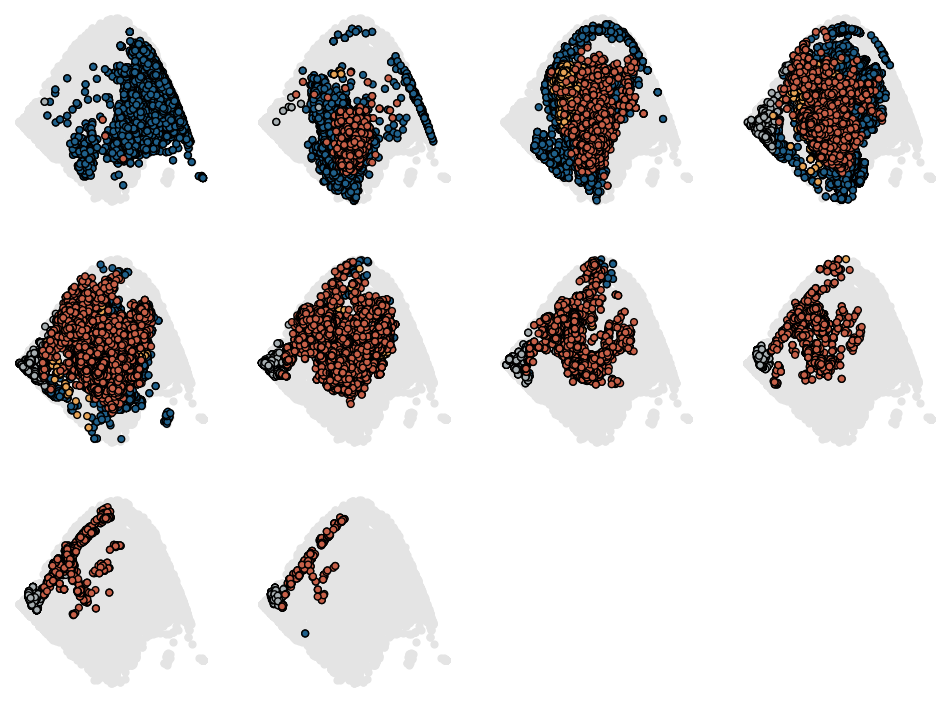

In [10]:
i = 4
x = [np.stack(unlabeled.data.loc[unlabeled.data['l_bin']==k, 'z_' + columns[i]].values) for k in range(1,n_bins+1)]
y = [unlabeled.data.loc[unlabeled.data['l_bin']==k, columns[i] + '_pred'].values for k in range(1,n_bins+1)]
fig = models[i].plot_projection_slices(x=x, y=y, axes=[0,1], cmap=models[i].dmap, order=True)

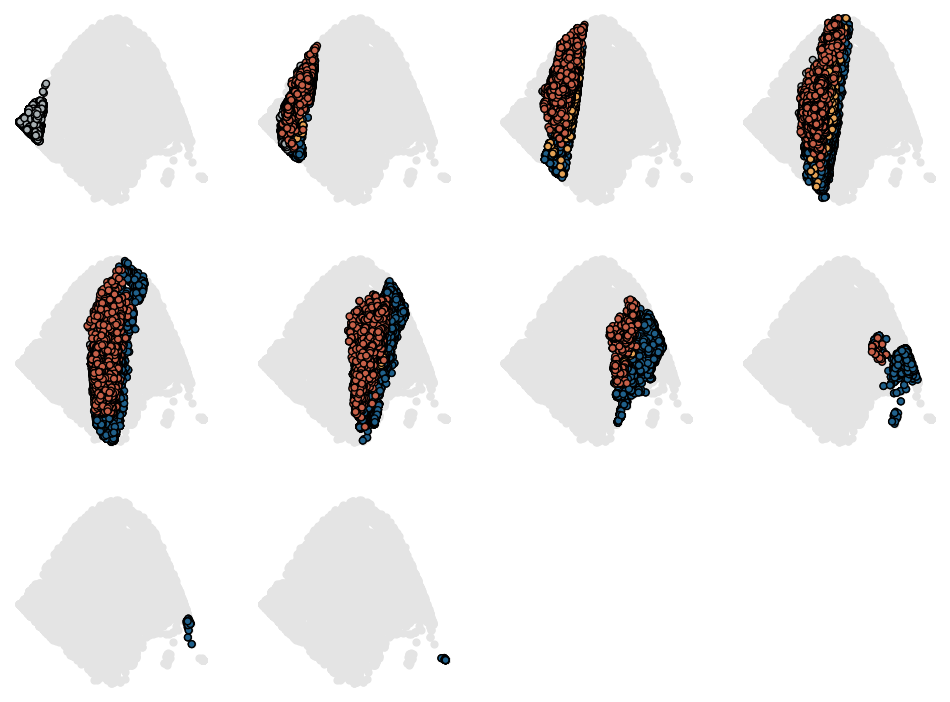

In [11]:
x = [np.stack(unlabeled.data.loc[unlabeled.data['A_bin']==k, 'z_' + columns[i]].values) for k in range(1,n_bins+1)]
y = [unlabeled.data.loc[unlabeled.data['A_bin']==k, columns[i] + '_pred'].values for k in range(1,n_bins+1)]
fig = models[i].plot_projection_slices(x=x, y=y, axes=[0,1], cmap=models[i].dmap, order=True)

### Threshold dependence

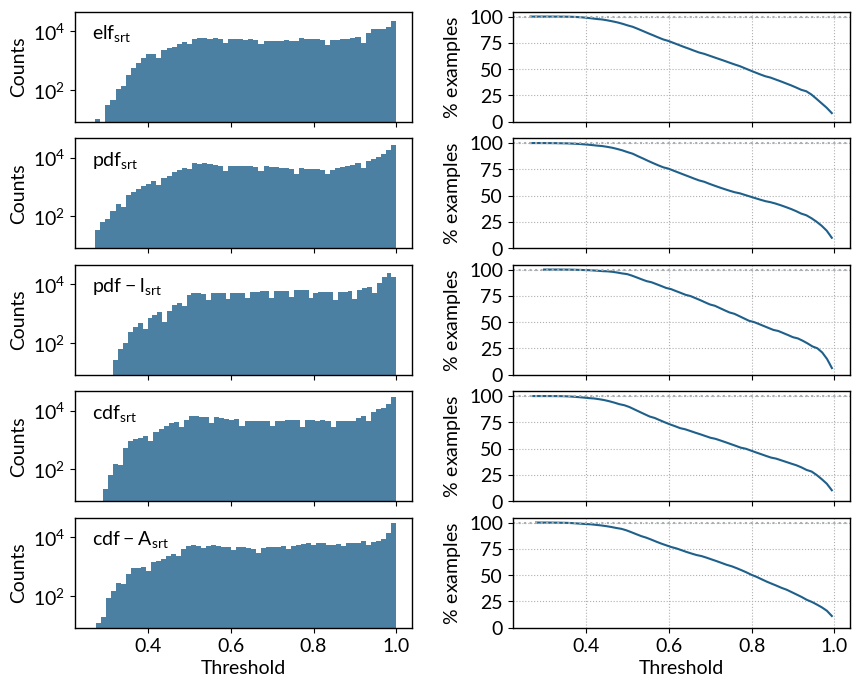

In [12]:
bins = 60
fig, ax = plt.subplots(len(columns), 2, figsize=(10,8), sharex=True, sharey='col')
fig.subplots_adjust(wspace=0.3, hspace=0.15)
for i, column in enumerate(columns):
    y, x, _ = ax[i,0].hist(unlabeled.data[column + '_pred_proba'].apply(max), bins=bins, log=True,
                           color=unlabeled.palette[0], alpha=0.8)
    ax[i,0].text(0.05, 0.9, r'$' + '_{'.join(column.split('_')) + '}$', ha='left', va='top',
                 transform=ax[i,0].transAxes)
    ax[i,1].plot(0.5*(x[:-1][::-1] + x[1:][::-1]), 100*y[::-1].cumsum()/len(unlabeled.data),
                 color=unlabeled.palette[0])
    ax[i,1].axhline(100, color=unlabeled.palette[1], ls=':')
    ax[i,1].set_ylim(bottom=0)
    ax[i,1].locator_params(axis='y', nbins=5)
    ax[i,1].grid(visible=True, ls=':')
    
    ax[i,0].set_ylabel('Counts')
    ax[i,1].set_ylabel(r'$\%\ examples$')

ax[-1,0].set_xlabel('Threshold')
ax[-1,1].set_xlabel('Threshold');

### Inspect candidate MDHs

In [43]:
formulas = [473, 479, 736, 816, 1125, 1413, 1511, 1587, 1684, 2306, 2344, 2430, 2975]
threshold = 0.6
column = columns[4]

mdh = unlabeled.get_mdhs(column=column, n_classes=n_classes, threshold=threshold, formulas=None)

Number of candidate MDHs: 56


3379


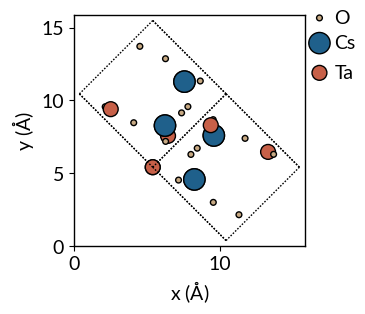

In [168]:
i = 55
entry = mdh.iloc[i]
print(entry.formula)
struct = entry.structure
unlabeled.plot_structure(struct, rotation=('0x,0y,0z'));

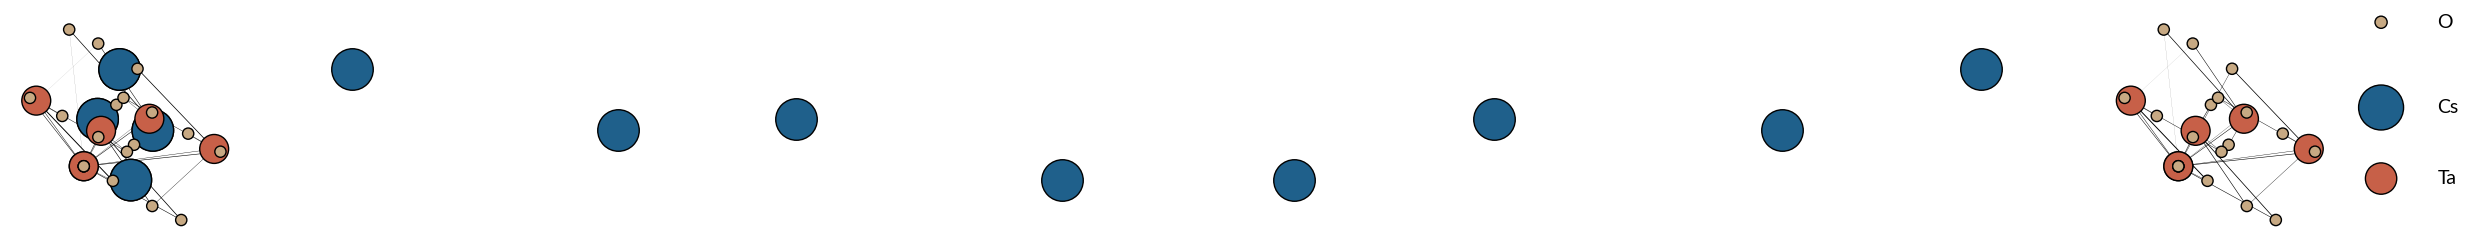

In [169]:
G = unlabeled.get_graph(entry.nodes, entry.edges)
S = [G.subgraph(k).copy() for k in nx.connected_components(G)]

options = {'with_labels': False,
           'edgecolors': 'black'}

fig, ax = plt.subplots(1, len(S)+1, figsize=((len(S)+1)*3,5), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.01)
for j in range(len(ax)):
    ax[j].set_aspect('equal')

symbols = list(nx.get_node_attributes(G, 'symbol').values())
usymbols = np.unique(symbols)
sym2num = dict(zip(usymbols, range(len(usymbols))))
nnorm = plt.Normalize(vmin=0, vmax=len(usymbols)-1)

node_size = [150*k**2 for k in nx.get_node_attributes(G, 'radius').values()]
node_color = [unlabeled.dmap_c(nnorm(sym2num[k])) for k in symbols]
try: edge_weight = np.stack(list(nx.get_edge_attributes(G, 'score').values())).max(axis=-1)
except: edge_weight = 1.
else: edge_weight = (edge_weight - threshold)/(1 - threshold)
nx.draw(G, pos=nx.get_node_attributes(G, 'pos'), node_size=node_size, node_color=node_color, width=edge_weight,
        **options, ax=ax[0])

for j in range(len(S)):
    symbols = list(nx.get_node_attributes(S[j], 'symbol').values())
    node_size = [150*k**2 for k in nx.get_node_attributes(S[j], 'radius').values()]
    node_color = [unlabeled.dmap_c(nnorm(sym2num[k])) for k in symbols]
    try: edge_weight = np.stack(list(nx.get_edge_attributes(S[j], 'score').values())).max(axis=-1)
    except: edge_weight = 1.
    else: edge_weight = (edge_weight - threshold)/(1 - threshold)
    nx.draw(S[j], pos=nx.get_node_attributes(S[j], 'pos'), node_size=node_size, node_color=node_color,
            width=edge_weight, **options, ax=ax[j+1])

numbers = list(nx.get_node_attributes(G, 'number').values())
numbers = np.unique(numbers)
symbols = Symbols(numbers)
radii = 0.5*covalent_radii[numbers]
x = ax[-1].get_xlim()[1]
y = ax[-1].get_ylim()[1]
dx = np.diff(ax[-1].get_xlim())/10.
dy = np.diff(ax[-1].get_ylim())/len(radii)
k = 0
for j, r in enumerate(radii):
    k += 0.5*r*dy
    ax[-1].add_patch(plt.Circle((x + 2*dx, y - k), 0.8*r*dx, ec='black', clip_on=False,
                                fc=unlabeled.dmap_c(nnorm(sym2num[symbols[j]]))))
    ax[-1].text(x + 2*dx*(1 + radii.max()), y - k, symbols[j], ha='left', va='center')
    k += 0.5*dy

In [185]:
thresholds = np.arange(0.,0.9,0.05)
column = columns[4]
n_mdh = np.zeros_like(thresholds)
for i, threshold in enumerate(thresholds):
    n_mdh[i] = len(unlabeled.get_mdhs(column, n_classes, threshold))

Number of candidate MDHs: 1095
Number of candidate MDHs: 1095
Number of candidate MDHs: 1095
Number of candidate MDHs: 1095
Number of candidate MDHs: 1095
Number of candidate MDHs: 1095
Number of candidate MDHs: 1082
Number of candidate MDHs: 985
Number of candidate MDHs: 811
Number of candidate MDHs: 584
Number of candidate MDHs: 264
Number of candidate MDHs: 94
Number of candidate MDHs: 54
Number of candidate MDHs: 26
Number of candidate MDHs: 11
Number of candidate MDHs: 4
Number of candidate MDHs: 1
Number of candidate MDHs: 1


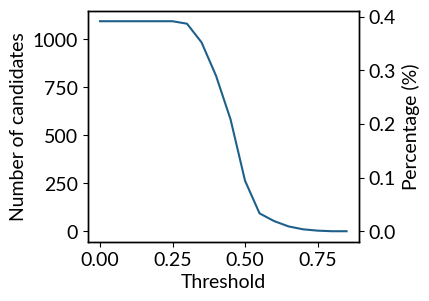

In [187]:
fig, ax = plt.subplots(figsize=(3.5,3))
_ax = ax.twinx()
ax.plot(thresholds, n_mdh, color='white')
_ax.plot(thresholds, 100*n_mdh/len(unlabeled.data), color=unlabeled.palette[0])
ax.set_xlabel('Threshold')
ax.set_ylabel('Number of candidates');
_ax.set_ylabel('Percentage (%)');